## Lecture 14, In-class illustration: solving ODEs with variation of parameters



In class, we are developing a powerful technique for identifying the solution to an ODE: the method of variation of parameters.  In physical problems, this approach is often called the identification and use of Green's functions.  In this exercise, we'll illustrate how the method works.


In [42]:
# before we get started, we need to import some useful functions
from numpy import arange,sin,cos,sum,multiply,zeros,argmin,append,flipud,array
from numpy import power,exp
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

We will look at the solutions to the equation 

$$\frac{d^2y}{dx^2} + y = f(x)$$

which is the equation that determines the location $y$ of a child with mass $m$ being pushed on a swing with force $f(x)/m$. Here you can think of $x$ as the time at which you observe the child's location.

In class, we will show that a particular solution to this equation is 

$$y_p(x) = \int_{\textrm{start time}}^x \sin(x-t) f(t) dt.$$

Here $t$ is the time at which you push the child with force $f(t)/m$.
<br><br>


Let's see how this should work by illustrating the oscillation of the child in response to various forces.  We'll consider various observation times $x$, and we'll plot $f(t)$, $\sin(x-t)f(t)$, and compute the integral for each value of $x$.

<br><br>
First, let's imagine you approach the child at times close to $t=0$ and give them a gentle push so that $f(t) = \exp(-(t/0.2)^2)$.

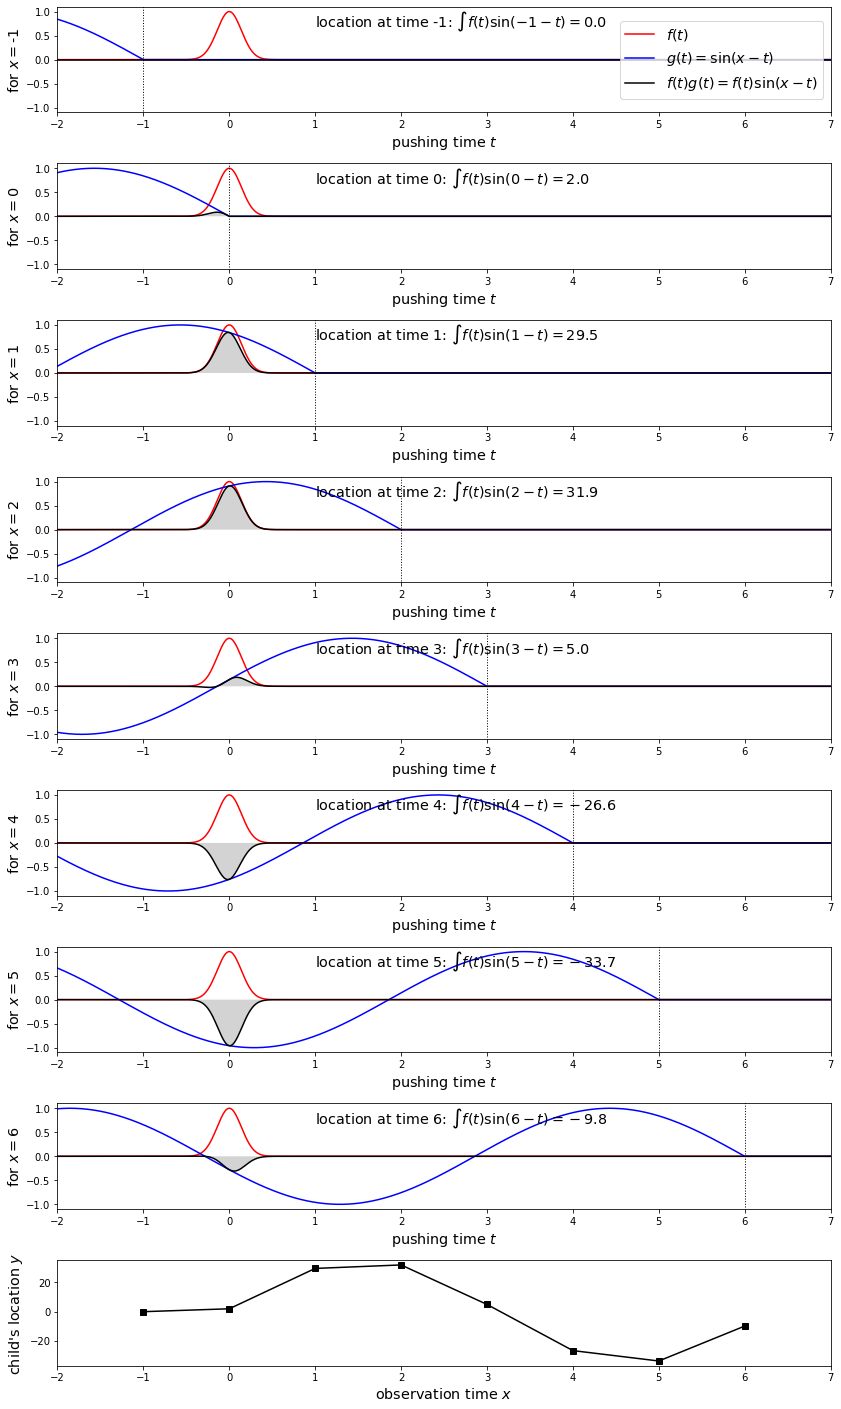

In [79]:
# to start, let's pick a set of times at which you might push the child
t = arange(-5,10,0.01)

# define the forcing function f(t): how hard you push
f = exp(-power(t/0.2,2))

# and let's identify a few times at which we will observe the child's location
x=[-1,0,1,2,3,4,5,6]

# we'll keep track of the responses: the integrals of f(t) * g(t)
ints = []

# set up the plots: one per observation time
fig,p=plt.subplots(len(x)+1,figsize=(12,20));
fig.tight_layout(pad=3.)
px=p[-1]

# we want to compute for each value of x
for m in range(0,len(x)):
    # plot the forcing function
    p[m].plot(t,f,color='red',label='$f(t)$');
    
    # plot the Green's function sin(x-t)
    gf = sin(x[m]-t)
    gf[t>x[m]]=0
    p[m].plot(t,gf,color='blue',label='$g(t) = \sin(x-t)$');
    
    # and plot the Green's function times the forcing function
    # f(t) sin(x-t)
    f_times_gf = multiply(f,gf)
    p[m].plot(t,f_times_gf,color='black',label='$f(t) g(t) = f(t) \sin(x-t)$');

    # and let's illustrate the region we want to integrate
    zrs = zeros(len(t))
    ply = Polygon(array([append(t,flipud(t)),append(f_times_gf,zrs)]).T)
    ply.set_color('lightgray')
    ply.set_edgecolor('none')
    p[m].add_patch(ply)
    
    # we can also go ahead and integrate f*sin(x-t)
    sm = sum(f_times_gf)
    
    # keep track of this to plot later
    ints.append(sm)

    lbl='location at time {:g}: $\int f(t) \sin({:g}-t) = {:0.1f}$'.format(x[m],x[m],sm)

    p[m].text(1,0.7,lbl,fontsize='x-large')
    p[m].set_xlabel('pushing time $t$',fontsize='x-large');
    p[m].set_xlim([-2,7]);
    p[m].plot([x[m],x[m]],[-2,2],color='black',linestyle=':',linewidth=1)
    p[m].set_ylim([-1.1,1.1])
    p[m].set_ylabel('for $x=${:g}'.format(x[m]),fontsize='x-large')


p[0].legend(fontsize='x-large',loc='right');

# finally, let's plot all the responses
px.plot(x,ints,marker='s',color='k')
px.set_xlabel('observation time $x$',fontsize='x-large');
px.set_ylabel('child\'s location $y$',fontsize='x-large');
px.set_xlim([-2,7]);




So it seems like if we apply an impulsive push at time 0, the child oscillates on the swing as you might expect.

But what if we apply an alternating push with period $2\pi/3$, so that

$$f(t) = \sin(3t)?$$

We can compute the response exactly as above.

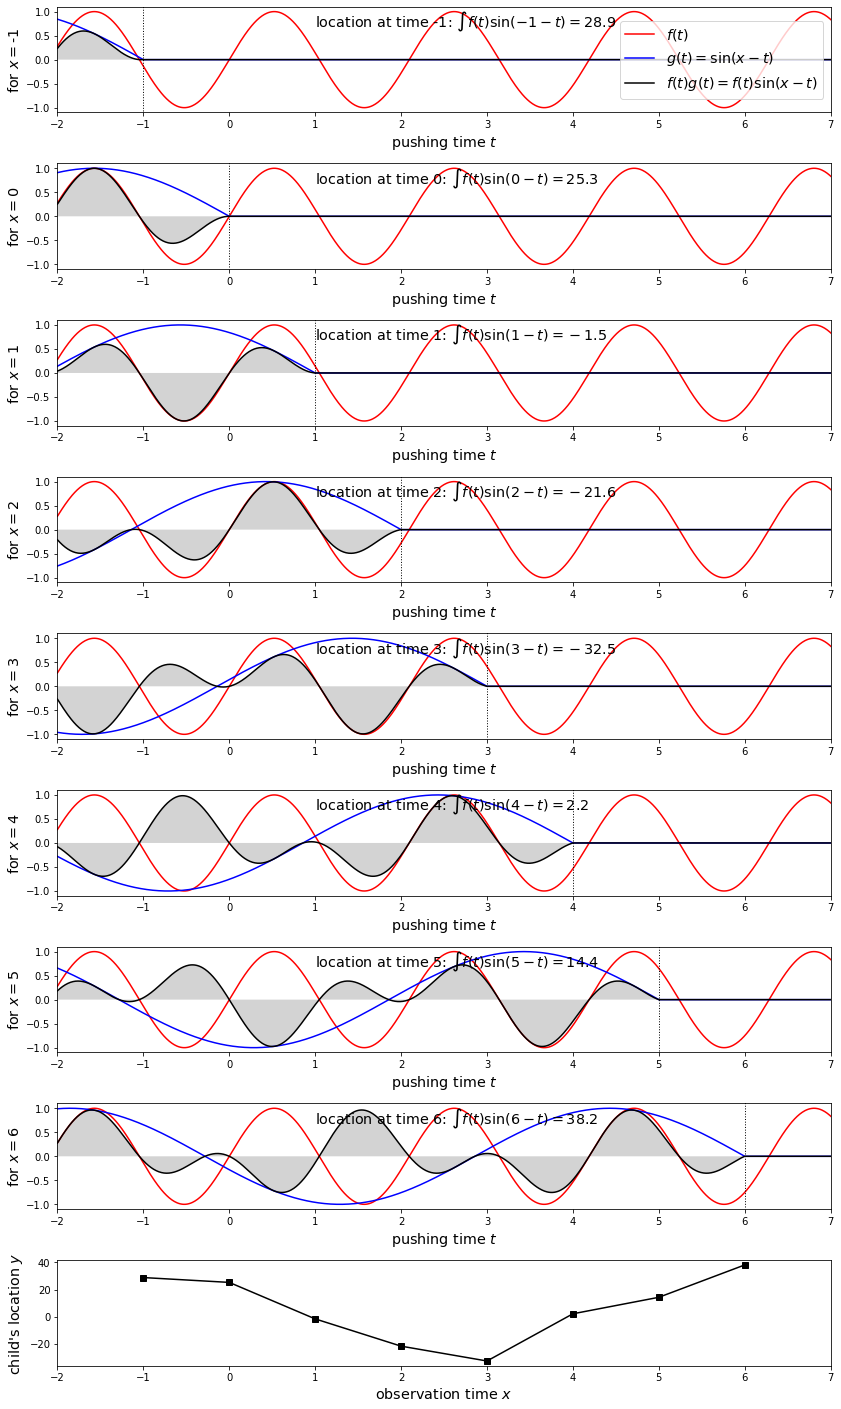

In [76]:
# to start, let's pick a set of times at which you might push the child
t = arange(-5,10,0.01)

# define the forcing function f(t): how hard you push
f = sin(3*t)

# and let's identify a few times at which we will observe the child's location
x=[-1,0,1,2,3,4,5,6]

# we'll keep track of the responses: the integrals of f(t) * g(t)
ints = []

# set up the plots: one per observation time
fig,p=plt.subplots(len(x)+1,figsize=(12,20));
fig.tight_layout(pad=3.)
px=p[-1]

# we want to compute for each value of x
for m in range(0,len(x)):
    # plot the forcing function
    p[m].plot(t,f,color='red',label='$f(t)$');
    
    # plot the Green's function sin(x-t)
    gf = sin(x[m]-t)
    gf[t>x[m]]=0
    p[m].plot(t,gf,color='blue',label='$g(t) = \sin(x-t)$');
    
    # and plot the Green's function times the forcing function
    # f(t) sin(x-t)
    f_times_gf = multiply(f,gf)
    p[m].plot(t,f_times_gf,color='black',label='$f(t) g(t) = f(t) \sin(x-t)$');

    # and let's illustrate the region we want to integrate
    zrs = zeros(len(t))
    ply = Polygon(array([append(t,flipud(t)),append(f_times_gf,zrs)]).T)
    ply.set_color('lightgray')
    ply.set_edgecolor('none')
    p[m].add_patch(ply)
    
    # we can also go ahead and integrate f*sin(x-t)
    sm = sum(f_times_gf)
    
    # keep track of this to plot later
    ints.append(sm)

    lbl='location at time {:g}: $\int f(t) \sin({:g}-t) = {:0.1f}$'.format(x[m],x[m],sm)

    p[m].text(1,0.7,lbl,fontsize='x-large')
    p[m].set_xlabel('pushing time $t$',fontsize='x-large');
    p[m].set_xlim([-2,7]);
    p[m].plot([x[m],x[m]],[-2,2],color='black',linestyle=':',linewidth=1)
    p[m].set_ylim([-1.1,1.1])
    p[m].set_ylabel('for $x=${:g}'.format(x[m]),fontsize='x-large')


p[0].legend(fontsize='x-large',loc='right');

# finally, let's plot all the responses
px.plot(x,ints,marker='s',color='k')
px.set_xlabel('observation time $x$',fontsize='x-large');
px.set_ylabel('child\'s location $y$',fontsize='x-large');
px.set_xlim([-2,7]);


We again get a somewhat oscillatory signal.  The response appears a bit complicated, but it's straightforward to compute.

Q1: What if we push the child with a force that oscillates with period $2\pi$, so that
$$f(t) = \sin(t)?$$
Will the child move more or less than when we pushed with a shorter period of $2\pi/3$?
<br><br><br><br>

Let's go ahead and do the computation.

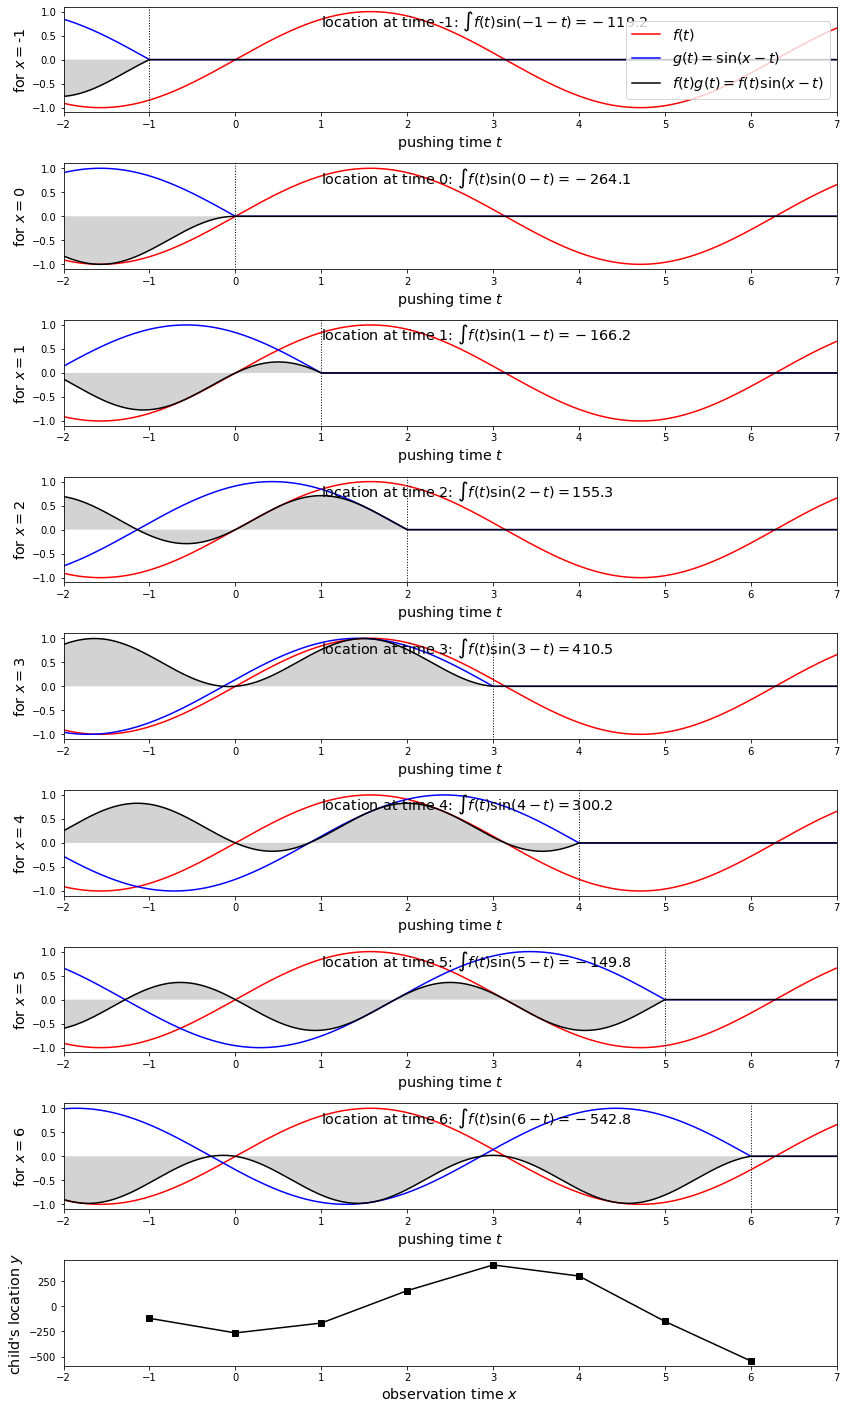

In [77]:
# to start, let's pick a set of times at which you might push the child
t = arange(-5,10,0.01)

# define the forcing function f(t): how hard you push
f = sin(t)

# and let's identify a few times at which we will observe the child's location
x=[-1,0,1,2,3,4,5,6]

# we'll keep track of the responses: the integrals of f(t) * g(t)
ints = []

# set up the plots: one per observation time
fig,p=plt.subplots(len(x)+1,figsize=(12,20));
fig.tight_layout(pad=3.)
px=p[-1]

# we want to compute for each value of x
for m in range(0,len(x)):
    # plot the forcing function
    p[m].plot(t,f,color='red',label='$f(t)$');
    
    # plot the Green's function sin(x-t)
    gf = sin(x[m]-t)
    gf[t>x[m]]=0
    p[m].plot(t,gf,color='blue',label='$g(t) = \sin(x-t)$');
    
    # and plot the Green's function times the forcing function
    # f(t) sin(x-t)
    f_times_gf = multiply(f,gf)
    p[m].plot(t,f_times_gf,color='black',label='$f(t) g(t) = f(t) \sin(x-t)$');

    # and let's illustrate the region we want to integrate
    zrs = zeros(len(t))
    ply = Polygon(array([append(t,flipud(t)),append(f_times_gf,zrs)]).T)
    ply.set_color('lightgray')
    ply.set_edgecolor('none')
    p[m].add_patch(ply)
    
    # we can also go ahead and integrate f*sin(x-t)
    sm = sum(f_times_gf)
    
    # keep track of this to plot later
    ints.append(sm)

    lbl='location at time {:g}: $\int f(t) \sin({:g}-t) = {:0.1f}$'.format(x[m],x[m],sm)

    p[m].text(1,0.7,lbl,fontsize='x-large')
    p[m].set_xlabel('pushing time $t$',fontsize='x-large');
    p[m].set_xlim([-2,7]);
    p[m].plot([x[m],x[m]],[-2,2],color='black',linestyle=':',linewidth=1)
    p[m].set_ylim([-1.1,1.1])
    p[m].set_ylabel('for $x=${:g}'.format(x[m]),fontsize='x-large')


p[0].legend(fontsize='x-large',loc='right');

# finally, let's plot all the responses
px.plot(x,ints,marker='s',color='k')
px.set_xlabel('observation time $x$',fontsize='x-large');
px.set_ylabel('child\'s location $y$',fontsize='x-large');
px.set_xlim([-2,7]);


The oscillation in this case is much larger because the Green's function $g(t) = \sin(x-t)$ is well aligned with the forcing $f(t) = \sin(t)$ for some values of $s$.  Hence the integral $f(t)g(t)$ can sum to large values.  Pushing with a period $2\pi$ takes advantage of the resonant frequency of the swing (aka pendulum).  You've almost certainly recognised and used this resonant frequency if you've ever pushed someone on a swing.

Note that while we have computed the responses to various forcings numerically above, in many cases, the response can be computed analytically.  

Q2: Say you start pushing at time $t=-5$, and you push with force $f(t) = \sin(t)$.  Compute the child's location $y$ as a function of the observation time $x$.

<br><br><br><br><br><br>